# Objective:-Implement SGD on Linear Regression

# Boston House Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline


## 1.1 Reading Data

In [2]:
# loading boston datasets
from sklearn.datasets import load_boston
import pandas as pd
boston_house_dataset=load_boston()

In [3]:
# spliting the data into train and test
from sklearn.model_selection import train_test_split
pd_boston_house_dataset=pd.DataFrame(data=boston_house_dataset.data)
price_boston=boston_house_dataset.target
X_train, X_test, y_train, y_test=train_test_split(pd_boston_house_dataset, price_boston, test_size=0.33, random_state=5)

In [4]:
# applying column standardization on train and test data

Standarising_data=StandardScaler()
X_train=Standarising_data.fit_transform(np.array(X_train))
X_test=Standarising_data.transform(np.array(X_test))

# preparing training data for manual sgd regressor

In [5]:

sgd_train_data_dataframe=pd.DataFrame(X_train)
sgd_train_data_dataframe['price_boston']=y_train

In [6]:
sgd_train_data_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,price_boston
0,0.911839,-0.502419,1.072305,-0.256978,1.633548,0.486034,0.962774,-0.823477,1.655334,1.552100,0.808078,-2.842959,1.523203,13.4
1,-0.411727,-0.502419,-1.129795,-0.256978,-0.552451,1.028078,0.668619,-0.183274,-0.871371,-0.802704,-0.304174,0.427436,-0.995240,23.6
2,0.124583,-0.502419,1.072305,-0.256978,1.441946,-3.913414,0.725324,-1.075955,1.655334,1.552100,0.808078,-0.053353,-0.765646,27.5
3,-0.406208,0.839388,-0.901940,-0.256978,-1.083710,0.097426,-0.515087,1.600509,-0.411970,-0.624310,-0.860301,0.152292,-0.184576,22.2
4,0.021742,-0.502419,1.072305,-0.256978,1.398401,0.123238,0.743044,-0.605107,1.655334,1.552100,0.808078,0.365116,0.301538,17.7


In [37]:
# converting to numpy array, which will be available for both SGDRegressor of sklearn and own  sgd regressor
X_test=np.array(X_test)
y_test=np.array(y_test)
bias_diff=[]
weight_num=[]

# In this case learning rate is 0.01 and it is fixed and number of iterations are changed

In [39]:
y_test.shape

(167,)

In [42]:
import warnings
warnings.filterwarnings('ignore')
#this particular function is basically used for sklearn Sgd regressor and predict thee price of the boston house dataset
def scikitlearn_sgd_regressor(alpha, lr_rate_variation, eta0=0.01, power_t=0.25, n_iter=100, train_data_scikit=X_train, test_data_scikit=X_test, train_y_scikit=y_train, test_y_scikit=y_test):
    clf_scikit=SGDRegressor(alpha=alpha, penalty=None, learning_rate=lr_rate_variation, eta0=eta0, power_t=power_t, n_iter=n_iter)
    clf_scikit.fit(train_data_scikit, train_y_scikit)
    y_pred_scikit=clf_scikit.predict(test_data_scikit)
    
    #scatter plot
    plt.scatter(test_y_scikit,y_pred_scikit)
    plt.title('Plot between predicted and actual')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.grid(b=True, linewidth=0.5)
    plt.show()
    print('***********************************************************')
    
    #kdeplot
    
       
    sgd_error=mean_squared_error(y_test,y_pred_scikit)
    print('Mean squared Error=', sgd_error)
    print('Number of iterations=', n_iter)
    
    return clf_scikit.coef_, clf_scikit.intercept_, sgd_error

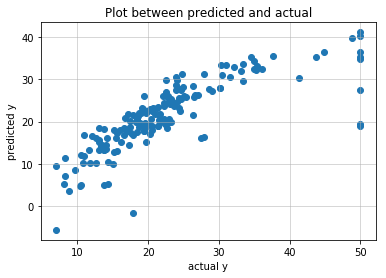

***********************************************************
Mean squared Error= 33.82334366972888
Number of iterations= 1


In [43]:
weight_sgd, bias_sgd, error_sgd=scikitlearn_sgd_regressor(alpha=0.001, lr_rate_variation='constant', eta0=0.01, n_iter=1)

In [45]:
# the below function is a simple implementation of sgd to linear regression, here we didn't use any regularization

In [46]:
#the below function is for applying sgd to linear regression given that we are not using any regularisation term
#the batch size taken for this function is 10
#here the learning rate is constant and invscaling learning rate
#the below function function for sgd returns weight and bias

def manual_sgd_regressor(X, learning_rate_variation, alpha=0.0001, learning_rate=0.01, power_t=0.25, n_iterations=100):
    weight_new=np.zeros(shape=(1,13))
    bias_new=0
    t=1
    r=learning_rate
    
    while(t<=n_iterations):
        weight_old=weight_new
        bias_old=bias_new
        weight_=np.zeros(shape=(1,13))
        bias_=0
        x_data_sgd=X.sample(10)
        x=np.array(x_data_sgd.drop('price_boston',axis=1))
        y=np.array(x_data_sgd['price_boston'])
        
        
        for i in range(10):  # for getting the derivatives using sgd with k=10
            y_curr=np.dot(weight_old,x[i])+bias_old
            weight_+=x[i] * (y[i] - y_curr)
            bias_+=(y[i]-y_curr)
            
            
        weight_*=(-2/x.shape[0])
        bias_*=(-2/x.shape[0])
        
        #updating the parameters
        weight_new=(weight_old-r*weight_)
        bias_new=(bias_old-r*bias_)
        
        
        if(learning_rate_variation=='invscaling'):
            r = learning_rate / pow(t, power_t)
        t+=1
        
    return weight_new, bias_new





In [47]:
#the given below function for predicting the values
def pred(x,w, b):
    y_pred_for_sgd=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred_for_sgd.append(y)
    return np.array(y_pred_for_sgd)




In [48]:
#the below function is used for scatter plot between the actual and predicted values
def plot_(test_data,y_pred_sgd):
    #scatter plot
    plt.scatter(y_test,y_pred_sgd)
    plt.grid(b=True, linewidth=0.3)
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.show()
    
    manual_error_for_sgd=mean_squared_error(y_test,y_pred_sgd)
    print('error_for_sgd=',manual_error_for_sgd)
    
    return manual_error_for_sgd

In [49]:
weight, bias= manual_sgd_regressor(X=sgd_train_data_dataframe, learning_rate_variation='constant' , n_iterations=1)

In [50]:
y_pred=pred(X_test, w=weight, b=bias)

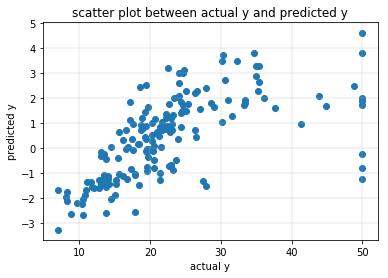

error_for_sgd= 564.5095918371304


In [51]:
manual_error=plot_(X_test,y_pred)

In [53]:
print('Sgd weight obtained after using sklearn---\n',weight_sgd)
print('*********************************************************************************')
print('Sgd weight obtained  after manually doing operations---\n',weight)

Sgd weight obtained after using sklearn---
 [-0.79148586  0.92223233 -0.69056782 -0.06137652 -0.63107871  2.87269428
 -0.46457071 -1.79285228  0.51973475 -0.83699965 -1.48325205  1.18017094
 -3.00659016]
*********************************************************************************
Sgd weight obtained  after manually doing operations---
 [[-0.14559482  0.21532617 -0.22692589  0.10249754 -0.12194477  0.20748295
  -0.18358955  0.14235858 -0.17512968 -0.14047497 -0.37201664 -0.0385428
  -0.26382219]]


In [54]:
#calculating the percentage weight difference between sgd with scikit nd sgd with manual operations
percent_diff_in_weights=abs((weight_sgd-weight)/weight)*100
cnt=0
for i in range(13):
    if (percent_diff_in_weights[0][i]>30):
        cnt+=1
weight_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 13


In [55]:
#  absolute diffrence in intercept obtained using both manual sgd and sgd using scikit
print('intercept obtained after using scikit=',bias_sgd)
print('intercept obtained after manually doing=',bias)
bias_diff.append(abs(bias_sgd-bias))

intercept obtained after using scikit= [21.99536431]
intercept obtained after manually doing= [0.489]


# SGDRegressor, n_iterations=100, learnng_rate=0.01, lr_rate_variation='constant'


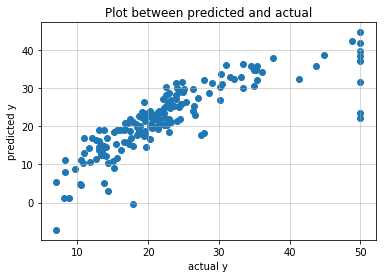

***********************************************************
Mean squared Error= 29.561559736490196
Number of iterations= 100


In [56]:
weight_sgd, bias_sgd, error_sgd=scikitlearn_sgd_regressor(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=100)


# manual_sgd_regressor n_iterations=100, learning_rate=0.01, learning_rate_variation='constant

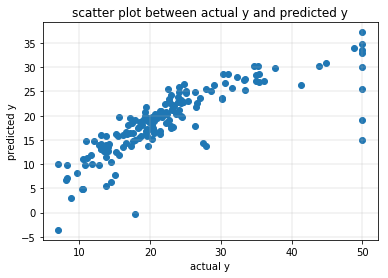

error_for_sgd= 45.355148417293364


In [59]:
weight, bias= manual_sgd_regressor(X=sgd_train_data_dataframe, learning_rate_variation='constant' , n_iterations=100)
y_pred=pred(X_test, w=weight, b=bias)
manual_error=plot_(X_test,y_pred)

In [62]:
print('wight obtained after using scikit---\n',weight_sgd)
print('*********************************************************************************')
print('weight obtained after applying manual sgd regressor---\n',weight)

wight obtained after using scikit---
 [-1.34020538  0.87096831 -0.60848435  0.38036348 -1.60130115  2.56877943
 -0.1723342  -2.78676779  2.92474428 -2.5720708  -2.27686463  0.92054307
 -3.54269734]
*********************************************************************************
weight obtained after applying manual sgd regressor---
 [[-0.78296861  0.30553655 -0.2655976   0.62080668 -0.3010944   2.60324367
  -0.87788876 -1.14326842  0.14905891 -0.4684207  -1.55443518  0.94699079
  -2.00500764]]


In [64]:
#  absolute diffrence in intercept obtained using both manual sgd and sgd using scikit
print('intercept obtained after using scikit=',bias_sgd)
print('intercept obtained after manually doing=',bias)
bias_diff.append(abs(bias_sgd-bias))

intercept obtained after using scikit= [22.6556385]
intercept obtained after manually doing= [19.38551948]


In [66]:
#calculating the percentage weight difference between sgd with scikit nd sgd with manual operations
percent_diff_in_weights=abs((weight_sgd-weight)/weight)*100
cnt=0
for i in range(13):
    if (percent_diff_in_weights[0][i]>30):
        cnt+=1
weight_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 11


# SGDRegressor, n_iter=1000, lr_rate=0.01, lr_rate_variation='constant'

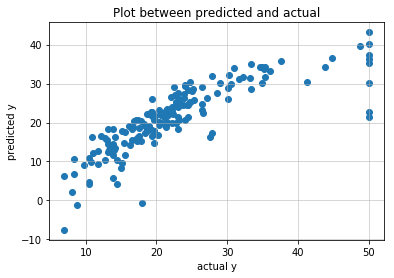

***********************************************************
Mean squared Error= 31.41620610663681
Number of iterations= 1000


In [68]:
weight_sgd, bias_sgd, error_sgd=scikitlearn_sgd_regressor(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=1000)

# manual sgd regressor, n_iter=1000, lr_rate=0.01, lr_rate_variation='constant'

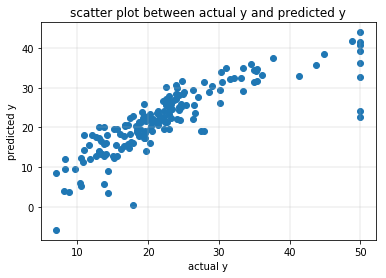

error_for_sgd= 27.579389281762346


In [71]:
weight, bias= manual_sgd_regressor(X=sgd_train_data_dataframe, learning_rate_variation='constant' , n_iterations=1000)
y_pred_manual_sgd=pred(X_test, w=weight, b=bias)
manual_error_for_sgd=plot_(X_test,y_pred_manual_sgd)

In [72]:
print('wight obtained after using scikit---\n',weight_sgd)
print('*********************************************************************************')
print('weight obtained after applying manual sgd regressor---\n',weight)

wight obtained after using scikit---
 [-1.47788116  1.03582206 -0.39193463  0.40226966 -1.53772868  2.35869815
 -0.45177717 -2.79103283  2.77964187 -2.58020213 -1.93513117  1.14294453
 -3.17914836]
*********************************************************************************
weight obtained after applying manual sgd regressor---
 [[-1.14501933  0.88262906 -0.17306226  0.33735027 -1.59287925  2.87923752
  -0.29904134 -2.58905919  2.22126307 -1.36547714 -2.19177163  0.86471802
  -3.52821694]]


In [74]:
#  absolute diffrence in intercept obtained using both manual sgd and sgd using scikit
print('intercept obtained after using scikit=',bias_sgd)
print('intercept obtained after manually doing=',bias)
bias_diff.append(abs(bias_sgd-bias))

intercept obtained after using scikit= [21.91303995]
intercept obtained after manually doing= [22.7078839]


In [75]:
#calculating the percentage weight difference between sgd with scikit nd sgd with manual operations
percent_diff_in_weights=abs((weight_sgd-weight)/weight)*100
cnt=0
for i in range(13):
    if (percent_diff_in_weights[0][i]>30):
        cnt+=1
weight_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 4


# SGDRegressor, n_iter=10000, lr_rate=0.01, lr_rate_variation='constant'

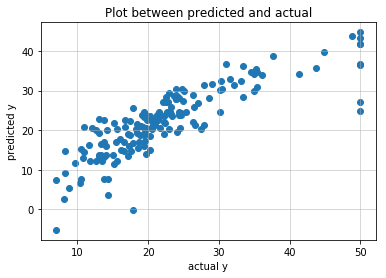

***********************************************************
Mean squared Error= 26.997029200764157
Number of iterations= 10000


In [77]:
weight_sgd, bias_sgd, error_sgd=scikitlearn_sgd_regressor(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=10000)

# manual sgd, n_iter=10000, lr_rate=0.01, lr_rate_variation='constant'

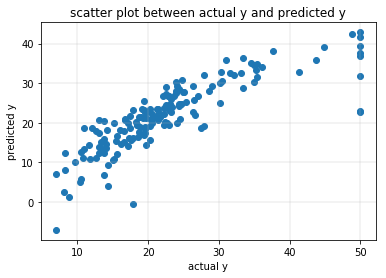

error_for_sgd= 29.214265912538263


In [79]:
weight, bias= manual_sgd_regressor(X=sgd_train_data_dataframe, learning_rate_variation='constant' , n_iterations=10000)
y_pred_manual_sgd=pred(X_test, w=weight, b=bias)
manual_error_for_sgd=plot_(X_test,y_pred_manual_sgd)

In [81]:
print('wight obtained after using scikit---\n',weight_sgd)
print('*********************************************************************************')
print('weight obtained after applying manual sgd regressor---\n',weight)

wight obtained after using scikit---
 [-0.91771127  1.05242394  0.01735648  0.52288646 -1.14104175  3.07811359
 -0.16418173 -3.1620164   3.31597636 -2.11010409 -2.25130629  1.46038719
 -3.67094785]
*********************************************************************************
weight obtained after applying manual sgd regressor---
 [[-1.30120723  1.0734261  -0.2148398   0.00584815 -1.62845115  2.95051172
  -0.2524181  -3.1753831   2.97618335 -2.2114788  -2.13171111  1.3080713
  -3.33468048]]


In [82]:
#  absolute diffrence in intercept obtained using both manual sgd and sgd using scikit
print('intercept obtained after using scikit=',bias_sgd)
print('intercept obtained after manually doing=',bias)
bias_diff.append(abs(bias_sgd-bias))

intercept obtained after using scikit= [23.03093048]
intercept obtained after manually doing= [22.4901007]


In [84]:
#calculating the percentage weight difference between sgd with scikit nd sgd with manual operations
percent_diff_in_weights=abs((weight_sgd-weight)/weight)*100
cnt=0
for i in range(13):
    if (percent_diff_in_weights[0][i]>30):
        cnt+=1
weight_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 3


# using 'optimal' learning rate

In [85]:
bias_optimal_diff=[]
weight_optimal_num=[]

# SGDRegressor, n_iter=1, lr_rate=0.01, lr_rate_variation='invscaling'

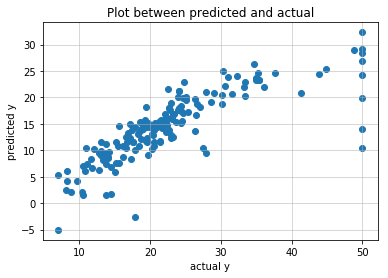

***********************************************************
Mean squared Error= 99.86137464270654
Number of iterations= 1


In [86]:
weight_sgd, bias_sgd, error_sgd=scikitlearn_sgd_regressor(alpha=0.0001, lr_rate_variation='invscaling', eta0=0.01, n_iter=1)

# manual sgd, n_iter=1, lr_rate=0.01, lr_rate_variation='invscaling'

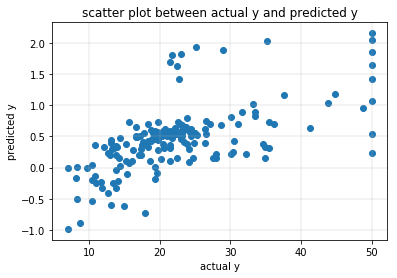

error_for_sgd= 574.3368373486402


In [89]:
weight, bias= manual_sgd_regressor(X=sgd_train_data_dataframe, learning_rate_variation='invscaling' , n_iterations=1)
y_pred_manual_sgd=pred(X_test, w=weight, b=bias)
manual_error_for_sgd=plot_(X_test,y_pred_manual_sgd)

In [92]:
print('wight obtained after using scikit---\n',weight_sgd)
print('*********************************************************************************')
print('weight obtained after applying manual sgd regressor---\n',weight)

wight obtained after using scikit---
 [-0.48396505  0.67727686 -0.61186386  0.52770865 -0.34764077  2.40797968
 -0.30668758 -0.83069037  0.0717669  -0.26378989 -1.46812312  0.69020712
 -1.90153709]
*********************************************************************************
weight obtained after applying manual sgd regressor---
 [[-0.06750643 -0.15350606 -0.04987269  0.28150114 -0.12634493  0.15429908
   0.0827868  -0.00644847  0.05140051 -0.04878303  0.00176891  0.15209155
  -0.04698766]]


In [93]:
#  absolute diffrence in intercept obtained using both manual sgd and sgd using scikit
print('intercept obtained after using scikit=',bias_sgd)
print('intercept obtained after manually doing=',bias)
bias_diff.append(abs(bias_sgd-bias))

intercept obtained after using scikit= [14.72674586]
intercept obtained after manually doing= [0.4672]


In [95]:
#calculating the percentage weight difference between sgd with scikit nd sgd with manual operations
percent_diff_in_weights=abs((weight_sgd-weight)/weight)*100
cnt=0
for i in range(13):
    if (percent_diff_in_weights[0][i]>30):
        cnt+=1
weight_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 13


# SGDRegressor, n_iter=100, lr_rate=0.01, lr_rate_variation='invscaling'

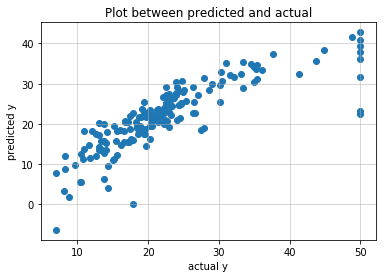

***********************************************************
Mean squared Error= 28.629697811391985
Number of iterations= 100


In [96]:
weight_sgd, bias_sgd, error_sgd=scikitlearn_sgd_regressor(alpha=0.0001, lr_rate_variation='invscaling', eta0=0.01, n_iter=100)

# Manual sgd, n_iter=100, lr_rate=0.01, lr_rate_variation='invscaling'

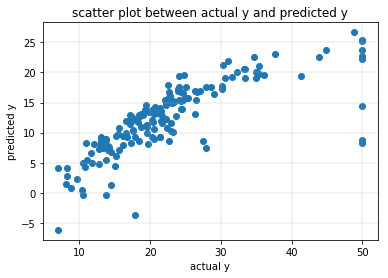

error_for_sgd= 139.81312781530448


In [99]:
weight, bias= manual_sgd_regressor(X=sgd_train_data_dataframe, learning_rate_variation='invscaling' , n_iterations=100)
y_pred_manual_sgd=pred(X_test, w=weight, b=bias)
manual_error_for_sgd=plot_(X_test,y_pred_manual_sgd)

In [101]:
print('wight obtained after using scikit---\n',weight_sgd)
print('*********************************************************************************')
print('weight obtained after applying manual sgd regressor---\n',weight)

wight obtained after using scikit---
 [-1.3005017   0.84056704 -0.28664164  0.19626309 -1.48642048  2.797079
 -0.35597459 -2.7926607   2.6126975  -1.89765279 -2.12503894  1.06412737
 -3.32791804]
*********************************************************************************
weight obtained after applying manual sgd regressor---
 [[-0.4521812   0.11920627 -0.52668409 -0.17405382 -0.30067448  2.30207999
   0.03355047 -0.57923233 -0.2713098  -0.65558895 -1.29653708  0.5537867
  -1.82876341]]


In [103]:
#  absolute diffrence in intercept obtained using both manual sgd and sgd using scikit
print('intercept obtained after using scikit=',bias_sgd)
print('intercept obtained after manually doing=',bias)
bias_diff.append(abs(bias_sgd-bias))

intercept obtained after using scikit= [22.52740928]
intercept obtained after manually doing= [12.83497026]


In [104]:
#calculating the percentage weight difference between sgd with scikit nd sgd with manual operations
percent_diff_in_weights=abs((weight_sgd-weight)/weight)*100
cnt=0
for i in range(13):
    if (percent_diff_in_weights[0][i]>30):
        cnt+=1
weight_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 12


#  Sgd, n_iter=1000, lr_rate=0.01, lr_rate_variation='invscaling'¶

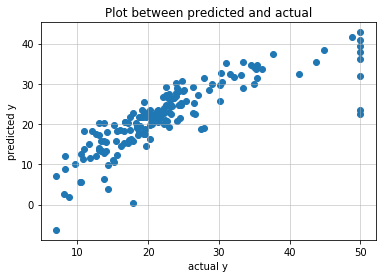

***********************************************************
Mean squared Error= 28.573932668187236
Number of iterations= 1000


In [105]:
weight_sgd, bias_sgd, error_sgd=scikitlearn_sgd_regressor(alpha=0.0001, lr_rate_variation='invscaling', eta0=0.01, n_iter=1000)

# Manual sgd, n_iter=1000, lr_rate=0.01, lr_rate_variation='invscaling'

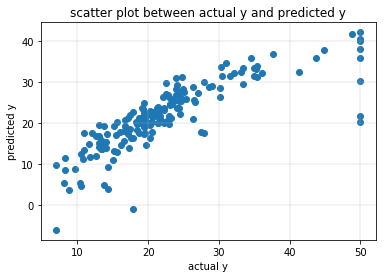

error_for_sgd= 30.482678718108343


In [107]:
weight, bias= manual_sgd_regressor(X=sgd_train_data_dataframe, learning_rate_variation='invscaling' , n_iterations=1000)
y_pred_manual_sgd=pred(X_test, w=weight, b=bias)
manual_error_for_sgd=plot_(X_test,y_pred_manual_sgd)

In [108]:
print('wight obtained after using scikit---\n',weight_sgd)
print('*********************************************************************************')
print('weight obtained after applying manual sgd regressor---\n',weight)

wight obtained after using scikit---
 [-1.31445737  0.86824319 -0.17067114  0.18726032 -1.49227296  2.78076156
 -0.33080864 -2.76630559  2.9750492  -2.2781071  -2.13455007  1.06191546
 -3.33752033]
*********************************************************************************
weight obtained after applying manual sgd regressor---
 [[-1.02572004  0.51588091 -0.50604512  0.16570951 -0.70126074  3.08250371
  -0.54139148 -1.91956013  0.92890209 -0.51403276 -2.10621023  0.94595935
  -3.21338773]]


In [109]:
#  absolute diffrence in intercept obtained using both manual sgd and sgd using scikit
print('intercept obtained after using scikit=',bias_sgd)
print('intercept obtained after manually doing=',bias)
bias_diff.append(abs(bias_sgd-bias))

intercept obtained after using scikit= [22.54452031]
intercept obtained after manually doing= [22.35967758]


In [110]:
#calculating the percentage weight difference between sgd with scikit nd sgd with manual operations
percent_diff_in_weights=abs((weight_sgd-weight)/weight)*100
cnt=0
for i in range(13):
    if (percent_diff_in_weights[0][i]>30):
        cnt+=1
weight_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 7


In [117]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["sno","algo","alpha","lr_rate_variation","init_lr_rate","power_t","n_iter","error"  ]
x.add_row([1, 'ScikitSGDRegressor', 0.0001, 'constant', 0.01, 0.25, 1, error_sgd ])
x.add_row([2, 'manual_sgd', 0.0001, 'constant', 0.01, 0.25, 1, manual_error ])
x.add_row([3, 'ScikitSGDRegressor', 0.0001, 'constant', 0.01, 0.25, 100, error_sgd])
x.add_row([4, 'manual_sgd', 0.0001, 'constant', 0.01, 0.25, 100, manual_error])
x.add_row([5, 'ScikitSGDRegressor', 0.0001, 'constant', 0.01, 0.25, 1000, error_sgd])
x.add_row([6, 'manual_sgd', 0.0001, 'constant', 0.01, 0.25, 1000, manual_error])
x.add_row([7, 'ScikitSGDRegressor', 0.0001, 'constant', 0.01, 0.25, 10000, error_sgd])
x.add_row([8, 'SGDRegressor', 0.0001, 'constant', 0.01, 0.25, 10000, error_sgd])                 
print(x)

+-----+--------------------+--------+-------------------+--------------+---------+--------+--------------------+
| sno |        algo        | alpha  | lr_rate_variation | init_lr_rate | power_t | n_iter |       error        |
+-----+--------------------+--------+-------------------+--------------+---------+--------+--------------------+
|  1  | ScikitSGDRegressor | 0.0001 |      constant     |     0.01     |   0.25  |   1    | 28.573932668187236 |
|  2  |     manual_sgd     | 0.0001 |      constant     |     0.01     |   0.25  |   1    | 45.355148417293364 |
|  3  | ScikitSGDRegressor | 0.0001 |      constant     |     0.01     |   0.25  |  100   | 28.573932668187236 |
|  4  |     manual_sgd     | 0.0001 |      constant     |     0.01     |   0.25  |  100   | 45.355148417293364 |
|  5  | ScikitSGDRegressor | 0.0001 |      constant     |     0.01     |   0.25  |  1000  | 28.573932668187236 |
|  6  |     manual_sgd     | 0.0001 |      constant     |     0.01     |   0.25  |  1000  | 45.3

In [118]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["sno","algo","alpha","lr_rate_variation","init_lr_rate","power_t","n_iter","error"  ]
x.add_row([1, 'ScikitSGDRegressor', 0.0001, 'invscaling', 0.01, 0.25, 1, error_sgd ])
x.add_row([2, 'manual_sgd', 0.0001, 'invscaling', 0.01, 0.25, 1, manual_error ])
x.add_row([3, 'ScikitSGDRegressor', 0.0001, 'invscaling', 0.01, 0.25, 100, error_sgd])
x.add_row([4, 'manual sgd', 0.0001, 'invscaling', 0.01, 0.25, 100, manual_error])
x.add_row([5, 'ScikitSGDRegressor', 0.0001, 'invscaling', 0.01, 0.25, 1000, error_sgd])
x.add_row([6, 'manual_sgd', 0.0001, 'invscaling', 0.01, 0.25, 1000, manual_error])
x.add_row([7, 'ScikitSGDRegressor', 0.0001, 'invscaling', 0.01, 0.25, 1000, error_sgd])
x.add_row([8, 'manual_sgd', 0.0001, 'invscaling', 0.01, 0.25, 1000, manual_error])                 
print(x)

+-----+--------------------+--------+-------------------+--------------+---------+--------+--------------------+
| sno |        algo        | alpha  | lr_rate_variation | init_lr_rate | power_t | n_iter |       error        |
+-----+--------------------+--------+-------------------+--------------+---------+--------+--------------------+
|  1  | ScikitSGDRegressor | 0.0001 |     invscaling    |     0.01     |   0.25  |   1    | 28.573932668187236 |
|  2  |     manual_sgd     | 0.0001 |     invscaling    |     0.01     |   0.25  |   1    | 45.355148417293364 |
|  3  | ScikitSGDRegressor | 0.0001 |     invscaling    |     0.01     |   0.25  |  100   | 28.573932668187236 |
|  4  |     manual sgd     | 0.0001 |     invscaling    |     0.01     |   0.25  |  100   | 45.355148417293364 |
|  5  | ScikitSGDRegressor | 0.0001 |     invscaling    |     0.01     |   0.25  |  1000  | 28.573932668187236 |
|  6  |     manual_sgd     | 0.0001 |     invscaling    |     0.01     |   0.25  |  1000  | 45.3